# Обучение с подкреплением

## Обучение с учителем

Если у нас есть набор примеров с правильными ответами, то мы используем эту выборку для обучения нашей модели, а после обучения, применяем её к неразмеченным данным. Именно этот подход мы использовали, когда обучали классификатор для MNIST, подавая на вход сети картинки с изображениями рукописных цифр и считая градиент для подстройки весов на основе разницы между известным лэйблом цифры и выходом нейросети.

## Обучение без учителя

В некоторых случаях у нас нет размеченных данных, на которых мы могли бы заранее обучить модель. Но, при решении некоторых задач, можно обойтись без размеченной выборки. Примером такой задачи является задача кластеризации.

## Обучение с подкреплением

В некоторых случаях существующие методы обучения без учителя нам не подходят. В то же время у нас нет возможности создать качественную обучающую выборку. При этом мы можем постфактум оценить действия нашей модели и использовать эту оценку подстроить модель так, чтобы она чаще совершала желательные действия и реже - нежелательные. В литературе такую оценку называют вознаграждением (reward), а обучение строится таким образом, чтобы это модель стремилась максимизироавть получаемое вознаграждение.

### Терминология: Агент и среда

Агент и среда - ключевые понятия в обучении с подкрелением.

**Агент** - программа, принимающая решение о дальнейших действиях на основе информации о состоянии среды.

**Среда** - это мир, в котором агент должен "выживать", т.е. всё, с чем агент может прямо или косвенно взаимодействовать. Среда обладает состоянием (State), агент может влиять на среду, совершая какие-то действия (Actions), переводя среду при этом из одного состояния в другое и получая какое-то вознаграждение. Среда описывается пространством возможных состояний. Конкретное состояние - вектор в этом пространстве.

<img src="agend_and_environment.gif">

В зависимости от конкретной задачи, агент может наблюдать либо полное состояние среды, либо только некоторую его часть. Во втором случае, агенту может потребоваться какое-то внутреннее представление полного состояния, которое будет обновляться по мере получения новых данных.

## Наиболее яркие примеры использования обучения с подкреплением
- В 2013 году DeepMind публикует статью Playing Atari with Deep Reinforcement Learning, где нейросети обучаются игре в старые игры от Atari, используя анализ изображения.
- В 2016 году нейросеть AlphaGO Google DeepMind  обыгрывает одного из сильнейших игроков в Go - Ли Седоля. При обучении AlphaGo использовались партии игры живых людей. Чуть позже будет представлена AlphaGO Zero, обучение которой было полностью построено на игре с самой собой. Новая сеть выиграла у старой со счётом 100:0, причём аппаратные ресурсы сократились с 48 TPU до 4 TPU (Tensor Processing Unit Google).
- В 2017 году нейросеть OpenAI 5 успешно участвует в соревновании по игре Dota.

## Классификация алгоритмов обучения с подкреплением

### Model-free / Model-based

Model-free не строит модель окружения или функции вознаграждения. Model-based алгоритм пытаетс предсказывать, каким будет следующее состояние окружения или вознаграждение.

### Value-based / policy-based

Policy-based  методы оптимизируют напрямую функцию принятия решения агента. Стратегия (policy) обычно представлена распределением вероятности доступных действий. Value-based метод оптимизирует оценку вознаграждения для всех действий и выбирает выбирает то-действие, по которому прогнозируется большее значение. Методы, основанные на Policy Gradients лучше работают при большой размерности пространства действий, а Value-based методы, такие, как Deep Q-Learning требуют меньшего количества повторений для сходимости при малой размерности.

### On-Policy / Off-Policy

Off-policy подход позволяет учиться на исторических данных или на записанных заранее действиях человека. On-policy - только на собственных действиях агента.

### Deterministic Policy / Stochastic Policy

В зависимости от среды, наша стратегия может быть либо детерминированной - выбираем сразу определённое действие с помощью argmax, либо стохастической, когда мы окончательное решение принимается с помощью генератора случайных чисел на основе распределения вероятности, выданного сетью.
 

- Q-learning
- Deep Q-learning (DQN)
- Double Deep Q-learning (DDQN)
- Proximal Policy Optimization
- Rainbow



# Недостатки RL

## Низкая скорость обучения (sample efficiency)

Общая проблема всех алгоритмов обучения с подкреплением - низкая скорость обучения. В то время, как человеку может быть достаточно одного повторения, чтобы выучить какое-то действие, агенту RL требуется десятки тысяч повторений даже в простых задачах. В какой-то степени это связано с несовершенством архитектуры, но самый большой вклад даёт тот факт, что человек может использовать накопленный в прошлом опыт из других областей. Игра Montezuma's Revenge - популярный подопытная среда для RL в последнее время. И яркий пример низкой эффективности повторений  у алгоритмов RL по сравнению с человеком. 

Челокек, как правило, быстро понимает, что нужно избегать черепа и забрать ключ, гравитация направлена вниз, а падение с большой высоты опасно. Алгоритму же приходиться обучаться с полного нуля. Если же подменить элементы интерфейса на неочевидные для человека, то его sample-efficency тоже сильно падает (хотя всё-равно лучше, чем RL).

<img src="game_prior.gif" width="700">

<img src="game_no_prior.gif" width="700">

Так же важным фактором являются редкие награды. Часто в ходе одного эпизода алгоритм делает множество различных действий, а награду полуает только в конце. Соответственно, веса сети можно обновить только в конце эпизода и нельзя поощерить или наказать конкретные действия внутри эпизода. В итоге требуется большое количество повторений для достижения оптимальных весов.

Один из способов улучшить эффективность при редких наградах - reward shaping - модификация функции награды так, чтобы явно поощерялись какие-то действия внутри эпизода. Но качественно сконструировать такую функцию тяжело, а ошибки в ней могут приводить к неожиданным эффектам:

<img src="coastrunner.gif" width="700">

В гонке лодок агент получал вознаграждене не только за победу в гонке, но и за сбор всяких ништяков. В итоге он решил, что гонка не очень-то и нужна, достаточно собирать ништяки.

<video controls src="upsidedown_half_cheetah.mp4" width="700"> </video>

У данного агента мы наблюдаем поподание в локлаьный минимум. Этот агент получает поощерение за набранную скорость. На начальном этапе во время случайного поиска агент обнаружил, что кувыркнуться вперёд даёт хорошее вознаграждение в начале. Постепенно, после нескольких попыток, переворачивание на спину закрепилось, как успешная стратегия. После закрепления такого поведения агент не смог выйти из этого состояния, т.к. оказалось проще научиться двигаться в таком состоянии, чем научиться переворачиваться обратно на ноги.

Похожее поведение можно случано получить, если поощерять агента за то, что его ноги оторваны от земли.
    
<video controls src="failed_reacher.mp4" width="700"> </video>

В данном примере случайная инициализация весов получилась такой, что к вращающейся "конечности" в каждой точке прикладывалась большая сила. В результате конечность начала быстро вращаться. Сложность избавления от такого поведения заключается в том, что для того, чтобы отступить от такой стратегии, нужно путём исследования случайных действий предпринять несколько попыток, когда робот не будет вращаться, чтобы такие действия могли закрепиться. Это возможно, но в данном запуске этого не произошло.

# Библиотека Gym

# Пример окружения Gym

In [2]:
!pip install gym

Processing c:\users\user\appdata\local\pip\cache\wheels\e9\26\9b\8a1a6599a91077a938ac4348cc3d3ac84bfab0dbfddeb4c6e7\gym-0.15.4-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/3c/f0ac5c2c73df30483e3677b6568ccd19d900a6f78a95bfcf20bbbb468986/opencv_python-4.1.2.30-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c1/49/334e279caa3231255725c8e860fa93e72083567625573421db8875846c14/cloudpickle-1.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1c/fc/dad5eaaab68f0c21e2f906a94ddb98175662cc5a654eee404d59554ce0fa/pyglet-1.3.2-py2.py3-none-any.whl
Processing c:\users\user\appdata\local\pip\cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e\future-0.18.2-cp36-none-any.whl


In [3]:
import gym
env = gym.make("MountainCar-v0")
MAX_NUM_EPISODES = 5000

for episode in range(MAX_NUM_EPISODES):
    done = False
    obs = env.reset()
    total_reward = 0.0 # To keep track of the total reward obtained in each episode
    step = 0
    while not done:
        env.render()
        
        
        
        action = env.action_space.sample()  # Sample random action.
                                            # This will be replaced
                                            # by our agent's action
                                            # when we # start
                                            # developing the agent algorithms
        
        
        next_state, reward, done, info = \
        env.step(action)  # Send the action to the
                          # environment and receive       
                          # the next_state, reward and
                          # whether done or not
        total_reward += reward
        step += 1
        obs = next_state
    print("\n Episode #{} ended in {} steps. total_reward={}".format(episode, step+1,
total_reward))
env.close()

OSError: exception: access violation reading 0x0000000000000000

# Q-Learning

Q-Learning - это метод основанный на представлении функции полезности Q(s, a) в виде таблицы. Соответственно, такой метод применим только для дискретного набора действий и дискретного количества состояний среды, причём желательно, чтобы число возможных действия и число состояний было небольшим. Ограниченно этот метод можно применить к средам с непрерывным состоянием, если его искусственно дискретизировать.



Если ввести функцию дисконтированного будущего вознаграждения:

\\[ R_t = \sum_{k=0}^{\infty}{\gamma^{k} r_{t+k+1}}, \quad где \quad \gamma \in (0, 1] \\],

то можно определить функцию \\( Q(s, a) \\) как математическое ожидание будущего вознаграждения при выполнении действий \\( a \\) в состоянии \\( s \\),

\\[ Q(S, A) = max_{\pi} \mathbb{E} [G_t | S_t = s, A_t = a, \pi] \\]

SARSA (State, Action, Reward, State, Action) /* on-policy */:

\\[ Q(S_t, A_t) = (1 - \alpha) Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1})] \\]

\\[ Q(S_t, A_t) = Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)] \\]

\\[ TD_{target} = r + \gamma Q(S_{t+1},A_{t+1})\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]

Q-обучение /* off-policy */:

Уравнение Беллмана:

\\[ Q(S_t,A_t) = Q(S_t, A_t) + \alpha [r_{t+1} +  \gamma \cdot max_{a}{Q(S_{t+1},a}) - Q(S_t, A_t) ] \\]

\\[ TD_{target} = r + \gamma max_{a} Q(S_{t+1},a)\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]


In [2]:
!pip install gym

Processing c:\users\user\appdata\local\pip\cache\wheels\e9\26\9b\8a1a6599a91077a938ac4348cc3d3ac84bfab0dbfddeb4c6e7\gym-0.15.4-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/3c/f0ac5c2c73df30483e3677b6568ccd19d900a6f78a95bfcf20bbbb468986/opencv_python-4.1.2.30-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/1c/fc/dad5eaaab68f0c21e2f906a94ddb98175662cc5a654eee404d59554ce0fa/pyglet-1.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/49/334e279caa3231255725c8e860fa93e72083567625573421db8875846c14/cloudpickle-1.2.2-py2.py3-none-any.whl
Processing c:\users\user\appdata\local\pip\cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e\future-0.18.2-cp36-none-any.whl


In [3]:
import numpy as np
import gym

EPSILON_MIN = 0.005
MAX_NUM_EPISODES = 20000
MAX_STEPS_PER_EPISODE = 500
max_num_steps = MAX_NUM_EPISODES * MAX_STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05 # learning rate
GAMMA = 0.95 # Discount factor
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each
                        # observation dim

class QAgent():
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS
        self.bin_width = (self.obs_high - self.obs_low) \
            / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a table to represent the Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                          self.action_shape)) # (51 x 51 x 3)
        self.alpha = ALPHA
        self.gamma = GAMMA
        self.epsilon = 1.0
    
    
    def discretize(self, obs):
        return tuple(((obs - self.obs_low) \
                      / self.bin_width).astype(int))
    
    
    def get_action(self, obs):
        discretized_obs  = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # choose a random action
            return np.random.choice([a for a in range(self.action_shape)])
        
    
    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] +=  self.alpha * td_error


def train_Q(agent, env):
    best_reward = -float('inf')
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
        best_reward = max(best_reward, total_reward)
        print("\rEpisode#:{} reward:{} best_reward:{} eps:{}"
             .format(episode, total_reward, best_reward, agent.epsilon), end="")
        
    # Return the trained policy
    return np.argmax(agent.Q, axis=2)


def test_Q(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    return total_reward


if __name__ == "__main__":
    env = gym.make('MountainCar-v0')
    agent = QAgent(env)
    learned_policy = train_Q(agent, env)
    # Use the Gym Monitor wrapper to evaluate the agent and record video
    gym_monitor_path = "./gym_monitor_output"
    env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
    for _ in range(1000):
        test_Q(agent, env, learned_policy)
    env.close()

Episode#:19999 reward:-165.0 best_reward:-112.0 eps:0.034332999948727344

In [4]:
env.close()

# Deep Q-Networks

Таблицу, аппроксимирующую нашу функцию качества можно заменить нейросетью, которая будет предсказывать значению Q сразу для всех возможных действий. В этом случае нам нужно определить функцию потерь, от которой мы будем считать градиент.

\\[ L = {TD_{error}}^2 \\]
\\[ L = (r + \gamma max_a Q(S_t, a) - Q(S_t, A_t))^2 \\]

# Улучшения DQN

## Experience replay

В большинстве окружений информация, получаемая агентом распределена не независимо. Т.е. последовательные наблюдения агента сильно коррелированы между собой (что понятно из интуитивных соображений, т.к. большинство окружений, в которых применяется RL, предполагают, что все изменения в них последовательны). Корреляция примеров ухудшает сходимость стохастического градиентного спуска. Таким образом нам нужен способ, который позволяет улучшить распределение примеров для обучения (устранить или снизить корреляцию между ними). Обычно используется метод **проигрывания опыта (experience replay)**. Суть этого метода в том, что мы сохраняем некоторое количество примеров (состояние, действия, вознаграждение) в специальном буфере и для обучения выбираем случайные мини-батчи из этого буфера.

Так же **experience replay** позволяет агенту эффективнее использовать свой прошлый опыт.

## Double DQN

Одной из проблем Q-Networks является неустойчивость. Часто разность ожидаемых вознаграждений для различных действий близка и поскольку выбор действия производится с помощью argmax, то выброс в данных может привести к тому, что выбираемое действие изменится. Для того, чтобы повысить стабильность используется техника **Target Q-Network**. Суть в том, что мы замораживаем веса нашей сети на фиксированное число шагов и затем используем её для вычисления функции ошибки и обучения второй сети. Периодически копируем из веса рабочей сети в Target Q-Network.
В следующем примере мы будем делать это каждый эпизод.

D:\Anaconda3\envs\Neew\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\Neew\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\Neew\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\Neew\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)         

episode: 75   score: 309.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 76   score: 269.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 77   score: 272.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 78   score: 243.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 79   score: 244.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 80   score: 282.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 81   score: 302.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 82   score: 278.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 83   score: 268.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 84   score: 236.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 85   score: 226.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 86   score: 252.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 87   score: 236.0  

episode: 176   score: 438.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 177   score: 440.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 178   score: 487.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 179   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 180   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 181   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 182   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 183   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 184   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 185   score: 443.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 186   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 187   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 188   s

episode: 276   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 277   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 278   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 279   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 280   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 281   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 282   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 283   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 284   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 285   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 286   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 287   score: 500.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 288   s

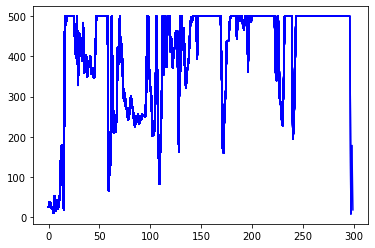

In [5]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

EPISODES = 300


# Double DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DoubleDQNAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = True
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # these is hyper parameters for the Double DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # initialize target model
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_ddqn.h5")

    # approximate Q function using Neural Network
    # state is input and Q Value of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(batch_size):
            update_input[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            update_target[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])

        target = self.model.predict(update_input)
        target_next = self.model.predict(update_target)
        target_val = self.target_model.predict(update_target)

        for i in range(self.batch_size):
            # like Q Learning, get maximum Q value at s'
            # But from target model
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                # the key point of Double DQN
                # selection of action is from model
                # update is from target model
                a = np.argmax(target_next[i])
                target[i][action[i]] = reward[i] + self.discount_factor * (
                    target_val[i][a])

        # make minibatch which includes target q value and predicted q value
        # and do the model fit!
        self.model.fit(update_input, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make('CartPole-v1')
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DoubleDQNAgent(state_size, action_size)
    agent.load_model = 1
    
    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score == 499 else -100

            # save the sample <s, a, r, s'> to the replay memory
            agent.append_sample(state, action, reward, next_state, done)
            # every time step do the training
            agent.train_model()
            score += reward
            state = next_state

            if done:
                # every episode update the target model to be same with model
                agent.update_target_model()

                # every episode, plot the play time
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_ddqn.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_ddqn.h5")
                    break

        # save the model
        if e % 50 == 0:
            agent.model.save_weights("./save_model/cartpole_ddqn.h5")

In [7]:
if __name__ == "__main__":
    try:
        env = gym.make('CartPole-v1')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DoubleDQNAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (De

# Другие улучшения DQN

## Prioritized Experience Replay

Минибатчи из памяти выбираются не с равномерным распределением, а добавляем туда больше примеров, в которых предсказанные значения Q сильнее всего отличаются от корректных. Т.е. примеры с максимальным **TD error** получают максимальный приоритет.

## Dueling networks

Основная идея в том, что мы разделяем нашу сеть на две головы, одна из которых предсказывает абсолютное значение состояния \\( V(S) \\), а вторая - относительное преимущество одний действий над другими \\( A(s, a) = Q(s, a) - V(s) \\). Это преимущество называется advantage. Далее из этих двух значений мы собираем нашу Q-функцию, как \\( Q(s,a) = V(s) + A(a) \\)

## Noisy nets

Т.к. по мере обучения агент будет стремиться выбирать состояния с максимальным Q, среду уже исследованных, это может помешать ему найти более эффективные состояния, в которых он ещё не было. Одним из решений этой проблемы является использование детерминированной и случайной нейросети, распределение параметров которой так же обучается с помощью градиентного спуска.

## Multi-step learning/n-step learning

Основная идея в том, чтобы считать функцию ошибки не по двум соседним примерам, а сразу по n. Это позволяет сети лучше запоминать длинные последовательности действий.

## Distributional RL

Детерминированное значение Q заменяется случайным распределением Z с некоторыми параметрами, которые определяются в ходе обучения.

# Rainbow

State of the art в развитии Q-обучения - набор перечисленных выше твиков. На графике ниже сравнение различных алгоритмов по количеству очков, усреднённое по играм Atari в сравнении со средними результатами человека.

<img src="rainbow_dqn.png" width="700">

# Policy Gradients

Мы используем нейросеть, которая получает на вход вектор состояния среды, а на выход сразу выдаёт вектор необходимых действий. Такой подход называется DPG (Deep Policy Gradients) или, в случае детерминированной стратегии, DDPG (Deep Deterministic Policy Gradients). Для подстройки весов в этом случае мы будем использовать градиент:
\\[ - \nabla log P(s, a, \theta) R \\]
где P - предсказание вероятности действий нейросетью, а R - полученное вознаграждение.

Основной минус этого метода - необходимо дожидаться конца эпизода для получения куммулятивного вознаграждения. В отличии от DQN возможна работа с непрерывными действиями, тогда, как DQN может работать только с дискретным набором.


In [15]:
!pip install gym[atari]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 220)               1100      
_________________________________________________________________
dense_51 (Dense)             (None, 220)               48620     
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 442       
Total params: 50,162
Trainable params: 50,162
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 27.0
episode: 1   score: 10.0
episode: 2   score: 13.0
episode: 3   score: 11.0
episode: 4   score: 8.0
episode: 5   score: 23.0
episode: 6   score: 18.0
episode: 7   score: 27.0
episode: 8   score: 36.0
episode: 9   score: 43.0
episode: 10   score: 33.0
episode: 11   score: 34.0
episode: 12   score: 32.0
episode: 13   score: 19.0
episode: 14   score: 20.0
episode: 15   score: 14

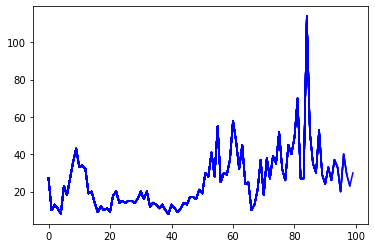

In [17]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 100


# This is Policy Gradient agent for the Cartpole
# In this example, we use DPG algorithm which uses monte-carlo update rule
class DPGAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.learning_rate = 0.01
        self.hidden1, self.hidden2 = 220, 220

        # create model for policy network
        self.model = self.build_model()

        # lists for the states, actions and rewards
        self.states, self.actions, self.rewards = [], [], []

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_dpg.h5")

    # approximate policy using Neural Network
    # state is input and probability of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden1, input_dim=self.state_size, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.hidden2, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.action_size, activation='softmax', kernel_initializer='glorot_uniform'))
        model.summary()
        # Using categorical crossentropy as a loss is a trick to easily
        # implement the policy gradient. Categorical cross entropy is defined
        # H(p, q) = sum(p_i * log(q_i)). For the action taken, a, you set 
        # p_a = advantage. q_a is the output of the policy network, which is
        # the probability of taking the action a, i.e. policy(s, a). 
        # All other p_i are zero, thus we have H(p, q) = A * log(policy(s, a))
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=self.learning_rate))
        return model

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.model.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # In Policy Gradient, Q function is not available.
    # Instead agent uses sample returns for evaluating policy
    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    # save <s, a ,r> of each step
    def append_sample(self, state, action, reward):
        self.states.append(state)
        self.rewards.append(reward)
        self.actions.append(action)

    # update policy network every episode
    def train_model(self):
        episode_length = len(self.states)

        discounted_rewards = self.discount_rewards(self.rewards)
        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)

        update_inputs = np.zeros((episode_length, self.state_size))
        advantages = np.zeros((episode_length, self.action_size))

        for i in range(episode_length):
            update_inputs[i] = self.states[i]
            advantages[i][self.actions[i]] = discounted_rewards[i]

        self.model.fit(update_inputs, advantages, epochs=1, verbose=0)
        self.states, self.actions, self.rewards = [], [], []

if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make('CartPole-v1')
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make DPG agent
    agent = DPGAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            reward = reward if not done or score == 499 else -100

            # save the sample <s, a, r> to the memory
            agent.append_sample(state, action, reward)

            score += reward
            state = next_state

            if done:
                # every episode, agent learns from sample returns
                agent.train_model()

                # every episode, plot the play time
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_dpg.png")
                print("episode:", e, "  score:", score)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_dpg.h5")
                    break

        # save the model
        if e % 50 == 0:
            agent.model.save_weights("./save_model/cartpole_dpg.h5")

In [18]:
if __name__ == "__main__":
    try:
        env = gym.make('CartPole-v1')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DPGAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 220)               1100      
_________________________________________________________________
dense_54 (Dense)             (None, 220)               48620     
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 442       
Total params: 50,162
Trainable params: 50,162
Non-trainable params: 0
_________________________________________________________________


NameError: name 'base' is not defined

# Улучшения метода Policy Gradients

Такого большого набора твиков, как для DQN для DPG не наблюдается. Наиболее известны методы: TRPO (Trust Region Policy Optimization) и PPO (Proximal Policy Optimization). В них заложена несколько разная математика, но суть обоих методов в ограничении изменения весов за один прогон для того, чтобы выбросы не портили выученную стратегию.

# Комбинирование подходов

## Actor-critic

Можно взять две сети, одна из которых будет предсказывать действия, а вторая - оценивать, насколько эти действия хороши, т.е. выдавать значение Q. Помимо самих действий ей на вход мы так же подадим состояне.

<img src="actor_critic.png">

Плюс в том, что нам не обязательно дожидаться окончания эпизода для обучения.

## Advantage-Actor-Critic, A2C

Вместо вычисления градиентов от абсолютного значения \\( Q(s, a) \\) мы можем использовать относительное преимущество одний действия над другими \\( A(s, a) = Q(s, a) - V(s) \)). Тогда если \\( A(s, a) > 0 \\), то градиентный спуск будет изменять все веса, повышая вероятность предсказанных действий. Если же \\( A(s, a) < 0 \\), то градиентный спуск будет понижать вероятность таких действий. \\( V(s) \\) при этом показывает, насколько состояние хорошо само по себе: если мы в двух шагах от вершины Эвереста, то это очень хороший state, а если мы летим в пропасть, то state крайне фиговый, чтобы мы в нём не делали (если, конечно, у нас нет с собой парашюта).

При использовании такого подхода функцию Q(s, a) можно заменить прямо на полученное вознаграждение за некоторое действие вознаграждение r. Тогда \\( A(s,a) = r - V(s) \\). При этом получается, что сети Actor и Critic можно объединить в одну с двумя головами, что улучшает переиспользование весов и ускоряет обучение.

<img src="a2c.png" width=700>

A3C или Asynchronous Advantage Actor Critic - означает, что у нас есть сервер, собирающий результаты с нескольких Actor'ов и обновляющий веса, когда наберётся батч достаточного размера. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 50        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 25        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 10.0
episode: 1   score: 11.0
episode: 2   score: 11.0
episo

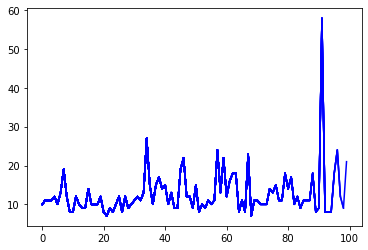

In [19]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 100


# A2C(Advantage Actor-Critic) agent for the Cartpole
class A2CAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = False
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005

        # create model for policy network
        self.actor = self.build_actor()
        self.critic = self.build_critic()

        if self.load_model:
            self.actor.load_weights("./save_model/cartpole_actor.h5")
            self.critic.load_weights("./save_model/cartpole_critic.h5")

    # approximate policy and value using Neural Network
    # actor: state is input and probability of each action is output of model
    def build_actor(self):
        actor = Sequential()
        actor.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        actor.add(Dense(self.action_size, activation='softmax',
                        kernel_initializer='he_uniform'))
        actor.summary()
        # See note regarding crossentropy in cartpole_reinforce.py
        actor.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=self.actor_lr))
        return actor

    # critic: state is input and value of state is output of model
    def build_critic(self):
        critic = Sequential()
        critic.add(Dense(24, input_dim=self.state_size, activation='relu',
                         kernel_initializer='he_uniform'))
        critic.add(Dense(self.value_size, activation='linear',
                         kernel_initializer='he_uniform'))
        critic.summary()
        critic.compile(loss="mse", optimizer=Adam(lr=self.critic_lr))
        return critic

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.actor.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # update policy network every episode
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (next_value) - value
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, maximum length of episode is 500
    env = gym.make('CartPole-v1')
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make A2C agent
    agent = A2CAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score == 499 else -100

            agent.train_model(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                # every episode, plot the play time
                score = score if score == 500.0 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_a2c.png")
                print("episode:", e, "  score:", score)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    break

        # save the model
        if e % 50 == 0:
            agent.actor.save_weights("./save_model/cartpole_actor.h5")
            agent.critic.save_weights("./save_model/cartpole_critic.h5")

In [20]:
if __name__ == "__main__":
    try:
        env = gym.make('CartPole-v1')
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = A2CAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 50        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 25        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


NameError: name 'base' is not defined

# Model-based

Ещё один подход заключается в том, что мы можем обучать нейросеть предсказывать следующее состояние среды, подавая ей на вход действия и предыдущее состояние. Таким образом нейросеть учит поведение среды. Для того, чтобы выбрать оптимальные действия, нам придётся прогнать все возможные действия через предсказание нейросети, поэтому такой подход применим только при малой размерности пространства действий.

# Imitation learning

Для того, чтобы агент выучил сложную последовательность действий, можно искуственно поставить его в конец этой траектории, тогда он быстро выучит, как пройти небольшой участок. После этого его можно поставить чуть дальше и так, пока агент на научится выполнять всю последовательность. 